In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()#tokenizer call
file = open('poems.txt', encoding="utf8")
data = file.read()#read poem.txt(Turkish poems)

corpus = data.lower().split("\n")#split words

tokenizer.fit_on_texts(corpus)#turn words into token
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'bir': 1, 'kadar': 2, 'bu': 3, 'gibi': 4, 'ne': 5, 've': 6, 'o': 7, 'mı': 8, 'seni': 9, "i̇stanbul'u": 10, 'dinliyorum': 11, 'ben': 12, 'gözlerim': 13, 'kapalı': 14, 'bayım': 15, 'sen': 16, 'ya': 17, 'güzel': 18, 'ki': 19, 'beni': 20, 'her': 21, 'kadın': 22, 'sana': 23, 'i': 24, 'de': 25, 'biraz': 26, 'bana': 27, 'şu': 28, 'göğe': 29, 'bakalım': 30, 'diye': 31, 'pür': 32, 'üç': 33, 'ey': 34, 'benim': 35, 'doğduğum': 36, 'şey': 37, 'içinde': 38, 'mi': 39, 'ı': 40, 'geçen': 41, 'yıl': 42, 'boyunca': 43, 'aşk': 44, 'aradım': 45, 'kaldı': 46, 'et': 47, 'hüzünlü': 48, 'artık': 49, 'giden': 50, 'hiç': 51, 'senin': 52, 'gelir': 53, 'var': 54, 'nasıl': 55, 'şimdi': 56, 'sokaklarda': 57, 'kendini': 58, 'çok': 59, 'küçük': 60, 'ihtizaz': 61, 'öğrendim': 62, 'aşkı': 63, 'gün': 64, 'i̇şte': 65, 'öyle': 66, 'gitti': 67, 'bunu': 68, 'beyaz': 69, 'tut': 70, 'bebek': 71, 'köylerde': 72, 'yüzden': 73, 'düşünürken': 74, 'taşı': 75, 'içimde': 76, 'kuş': 77, 'sıcak': 78, 'kim': 79, 'bilir': 80, 'i̇nsan':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
#check out some of words token number
print(tokenizer.word_index['makber'])
print(tokenizer.word_index['yükselir'])
print(tokenizer.word_index['razı'])

893
1023
875


In [5]:
print(tokenizer.word_index)

{'bir': 1, 'kadar': 2, 'bu': 3, 'gibi': 4, 'ne': 5, 've': 6, 'o': 7, 'mı': 8, 'seni': 9, "i̇stanbul'u": 10, 'dinliyorum': 11, 'ben': 12, 'gözlerim': 13, 'kapalı': 14, 'bayım': 15, 'sen': 16, 'ya': 17, 'güzel': 18, 'ki': 19, 'beni': 20, 'her': 21, 'kadın': 22, 'sana': 23, 'i': 24, 'de': 25, 'biraz': 26, 'bana': 27, 'şu': 28, 'göğe': 29, 'bakalım': 30, 'diye': 31, 'pür': 32, 'üç': 33, 'ey': 34, 'benim': 35, 'doğduğum': 36, 'şey': 37, 'içinde': 38, 'mi': 39, 'ı': 40, 'geçen': 41, 'yıl': 42, 'boyunca': 43, 'aşk': 44, 'aradım': 45, 'kaldı': 46, 'et': 47, 'hüzünlü': 48, 'artık': 49, 'giden': 50, 'hiç': 51, 'senin': 52, 'gelir': 53, 'var': 54, 'nasıl': 55, 'şimdi': 56, 'sokaklarda': 57, 'kendini': 58, 'çok': 59, 'küçük': 60, 'ihtizaz': 61, 'öğrendim': 62, 'aşkı': 63, 'gün': 64, 'i̇şte': 65, 'öyle': 66, 'gitti': 67, 'bunu': 68, 'beyaz': 69, 'tut': 70, 'bebek': 71, 'köylerde': 72, 'yüzden': 73, 'düşünürken': 74, 'taşı': 75, 'içimde': 76, 'kuş': 77, 'sıcak': 78, 'kim': 79, 'bilir': 80, 'i̇nsan':

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
46/46 [==============================] - 1s 20ms/step - loss: 6.9685 - accuracy: 0.0251
Epoch 2/100
46/46 [==============================] - 1s 21ms/step - loss: 6.3041 - accuracy: 0.0469
Epoch 3/100
46/46 [==============================] - 1s 16ms/step - loss: 5.3099 - accuracy: 0.0971
Epoch 4/100
46/46 [==============================] - 1s 18ms/step - loss: 3.9315 - accuracy: 0.2079
Epoch 5/100
46/46 [==============================] - 1s 15ms/step - loss: 2.3861 - accuracy: 0.4463
Epoch 6/100
46/46 [==============================] - 1s 13ms/step - loss: 1.2232 - accuracy: 0.7140
Epoch 7/100
46/46 [==============================] - 1s 15ms/step - loss: 0.6889 - accuracy: 0.8471
Epoch 8/100
46/46 [==============================] - 1s 14ms/step - loss: 0.4594 - accuracy: 0.8947
Epoch 9/100
46/46 [==============================] - 1s 15ms/step - loss: 0.3604 - accuracy: 0.9029
Epoch 10/100
46/46 [==============================] - 1s 15ms/step - loss: 0.3394 - accuracy: 0.9049

Epoch 82/100
46/46 [==============================] - 1s 19ms/step - loss: 0.2023 - accuracy: 0.9076
Epoch 83/100
46/46 [==============================] - 1s 16ms/step - loss: 0.1990 - accuracy: 0.9096
Epoch 84/100
46/46 [==============================] - 1s 14ms/step - loss: 0.2016 - accuracy: 0.9049
Epoch 85/100
46/46 [==============================] - 1s 14ms/step - loss: 0.1995 - accuracy: 0.9090
Epoch 86/100
46/46 [==============================] - 1s 14ms/step - loss: 0.1969 - accuracy: 0.9117
Epoch 87/100
46/46 [==============================] - 1s 14ms/step - loss: 0.1955 - accuracy: 0.9110
Epoch 88/100
46/46 [==============================] - 1s 13ms/step - loss: 0.1964 - accuracy: 0.9103
Epoch 89/100
46/46 [==============================] - 1s 14ms/step - loss: 0.1968 - accuracy: 0.9103
Epoch 90/100
46/46 [==============================] - 1s 14ms/step - loss: 0.1996 - accuracy: 0.9035
Epoch 91/100
46/46 [==============================] - 1s 13ms/step - loss: 0.1945 - accurac

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

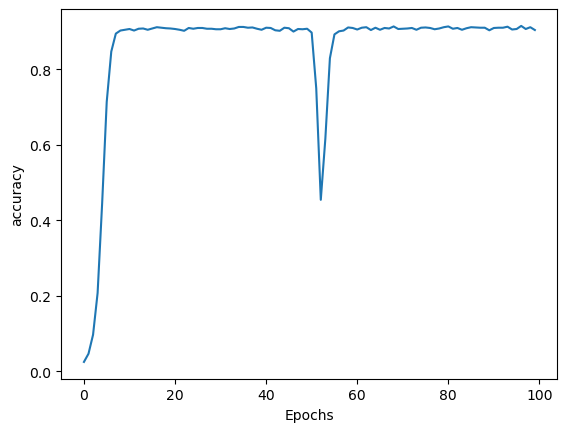

In [8]:
plot_graphs(history, 'accuracy')

In [9]:
seed_text = "Hayat yeterince zor değil mi?"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Hayat yeterince zor değil mi? bir köşeye çekilip taş bezi gibi kol giryânım giryânım yanımızda arasından kol bırakıp mı arasından kol mı mı çeşm i giryânım giryânım kol bayım düşünmüştüm kol giryânım kol kamışlarından mı mı arasından işte kol esen ihsan eder mı giryânım nemli nemli yanımızda nemli giryânım mı inanmaz mı mı yerinden mı çeşm düşünmüştüm giryânım giryânım mı giryânım kol düşünmüştüm kol mı mı çeşm bayım giryânım mı mı çeşm i giryânım kol giryânım rûşen rûşen kol kol ihsan giryânım kol mı dallar arasından bayım giryânım kol mı mı düşünmüştüm kol bayım mı inanmaz mı inanmaz mı mı arasından yerinden düşünmüştüm akar mı
